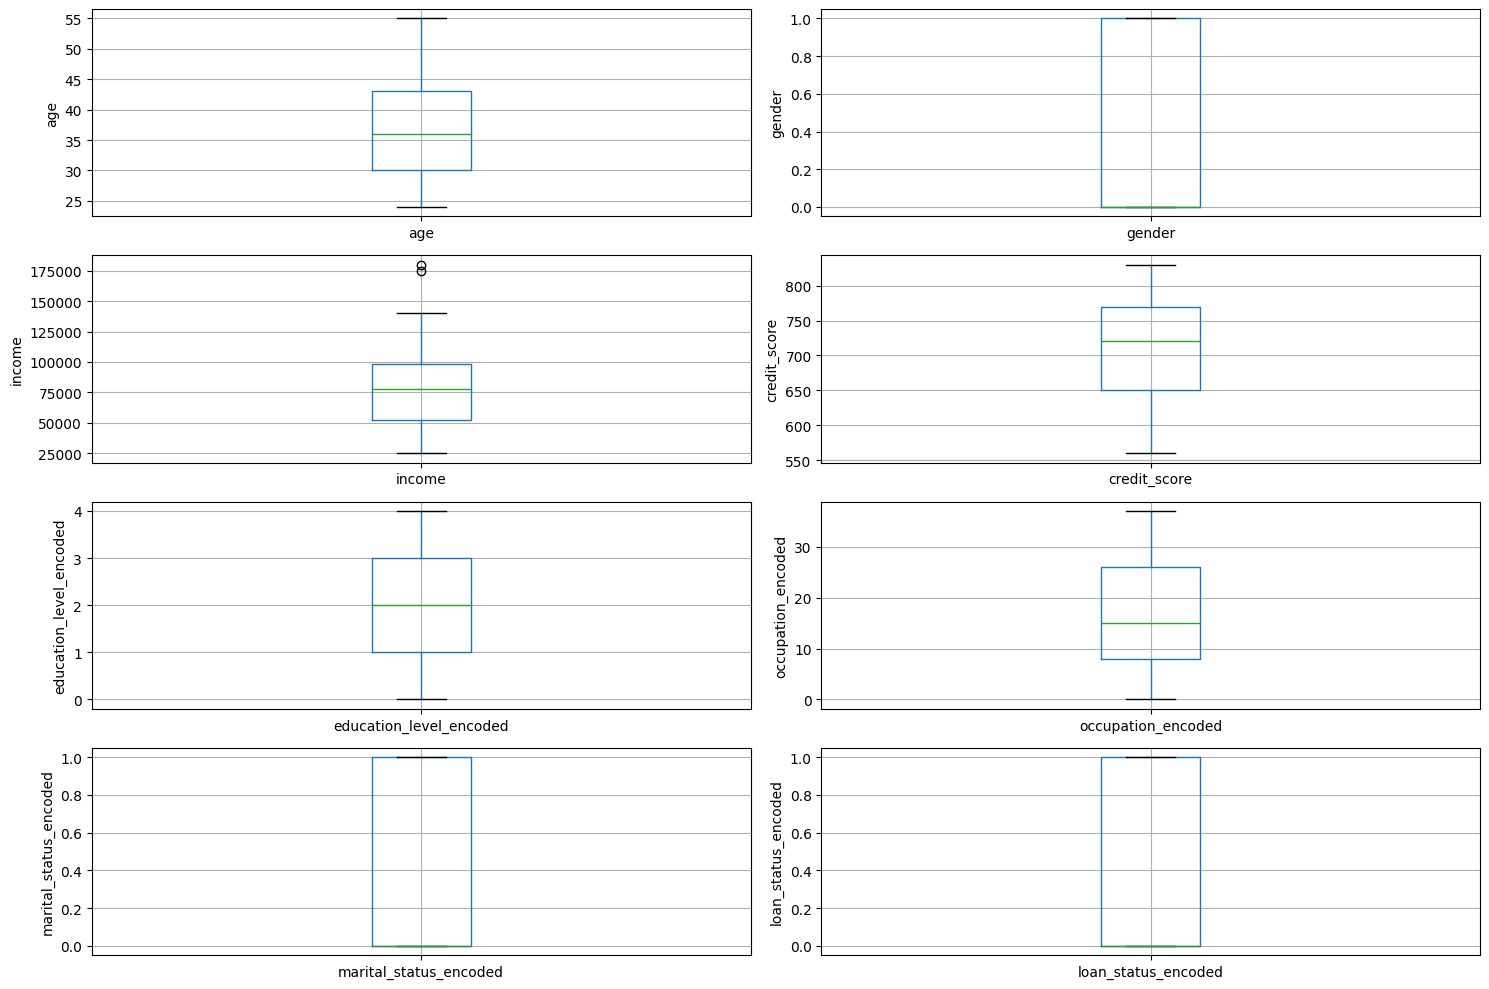

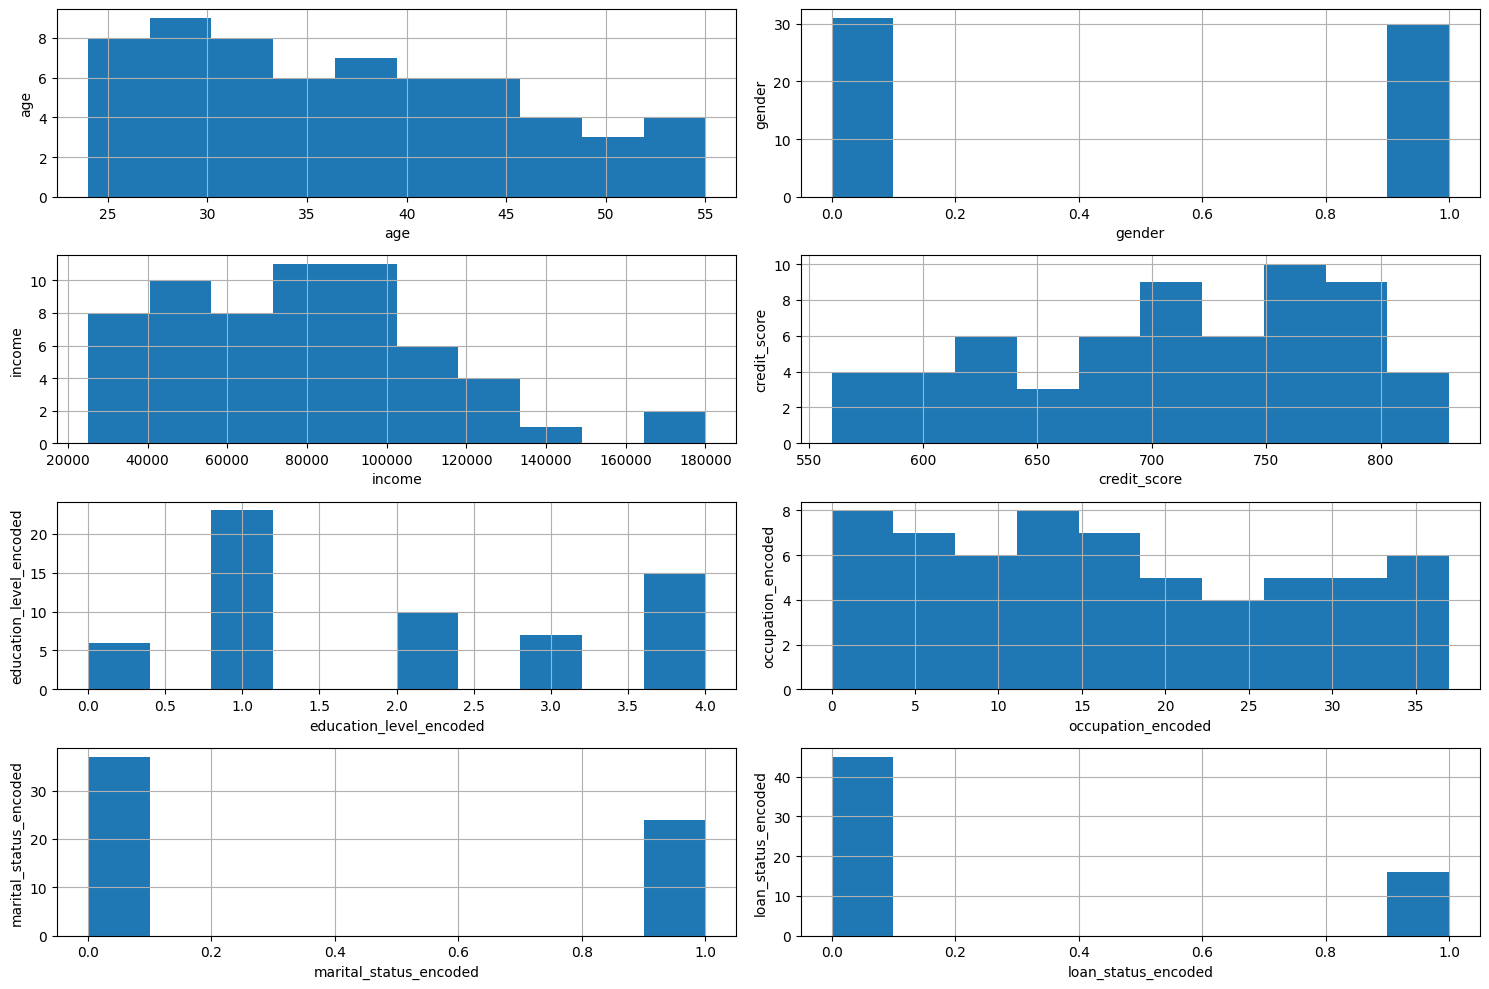

Age outliers are values < -9.0 or > 82.0
Income outliers are values < -86000.0 or > 236000.0
Credit score outliers are values < 290.0 or > 1130.0


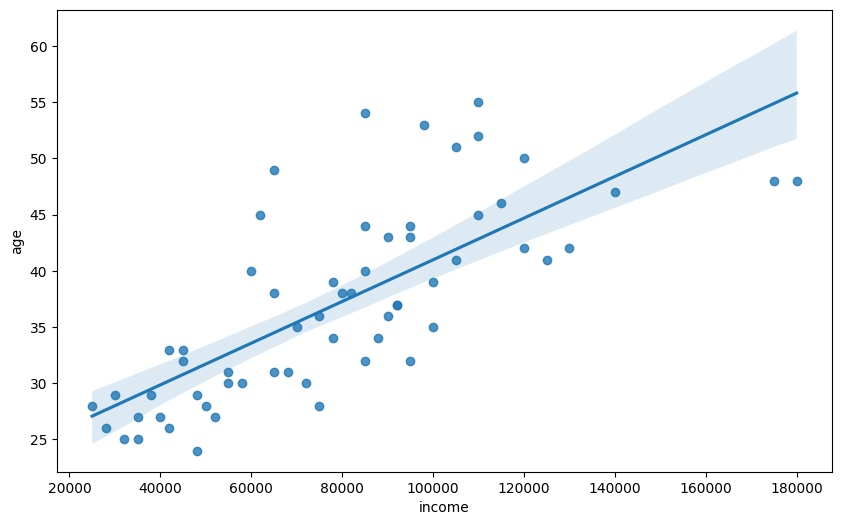

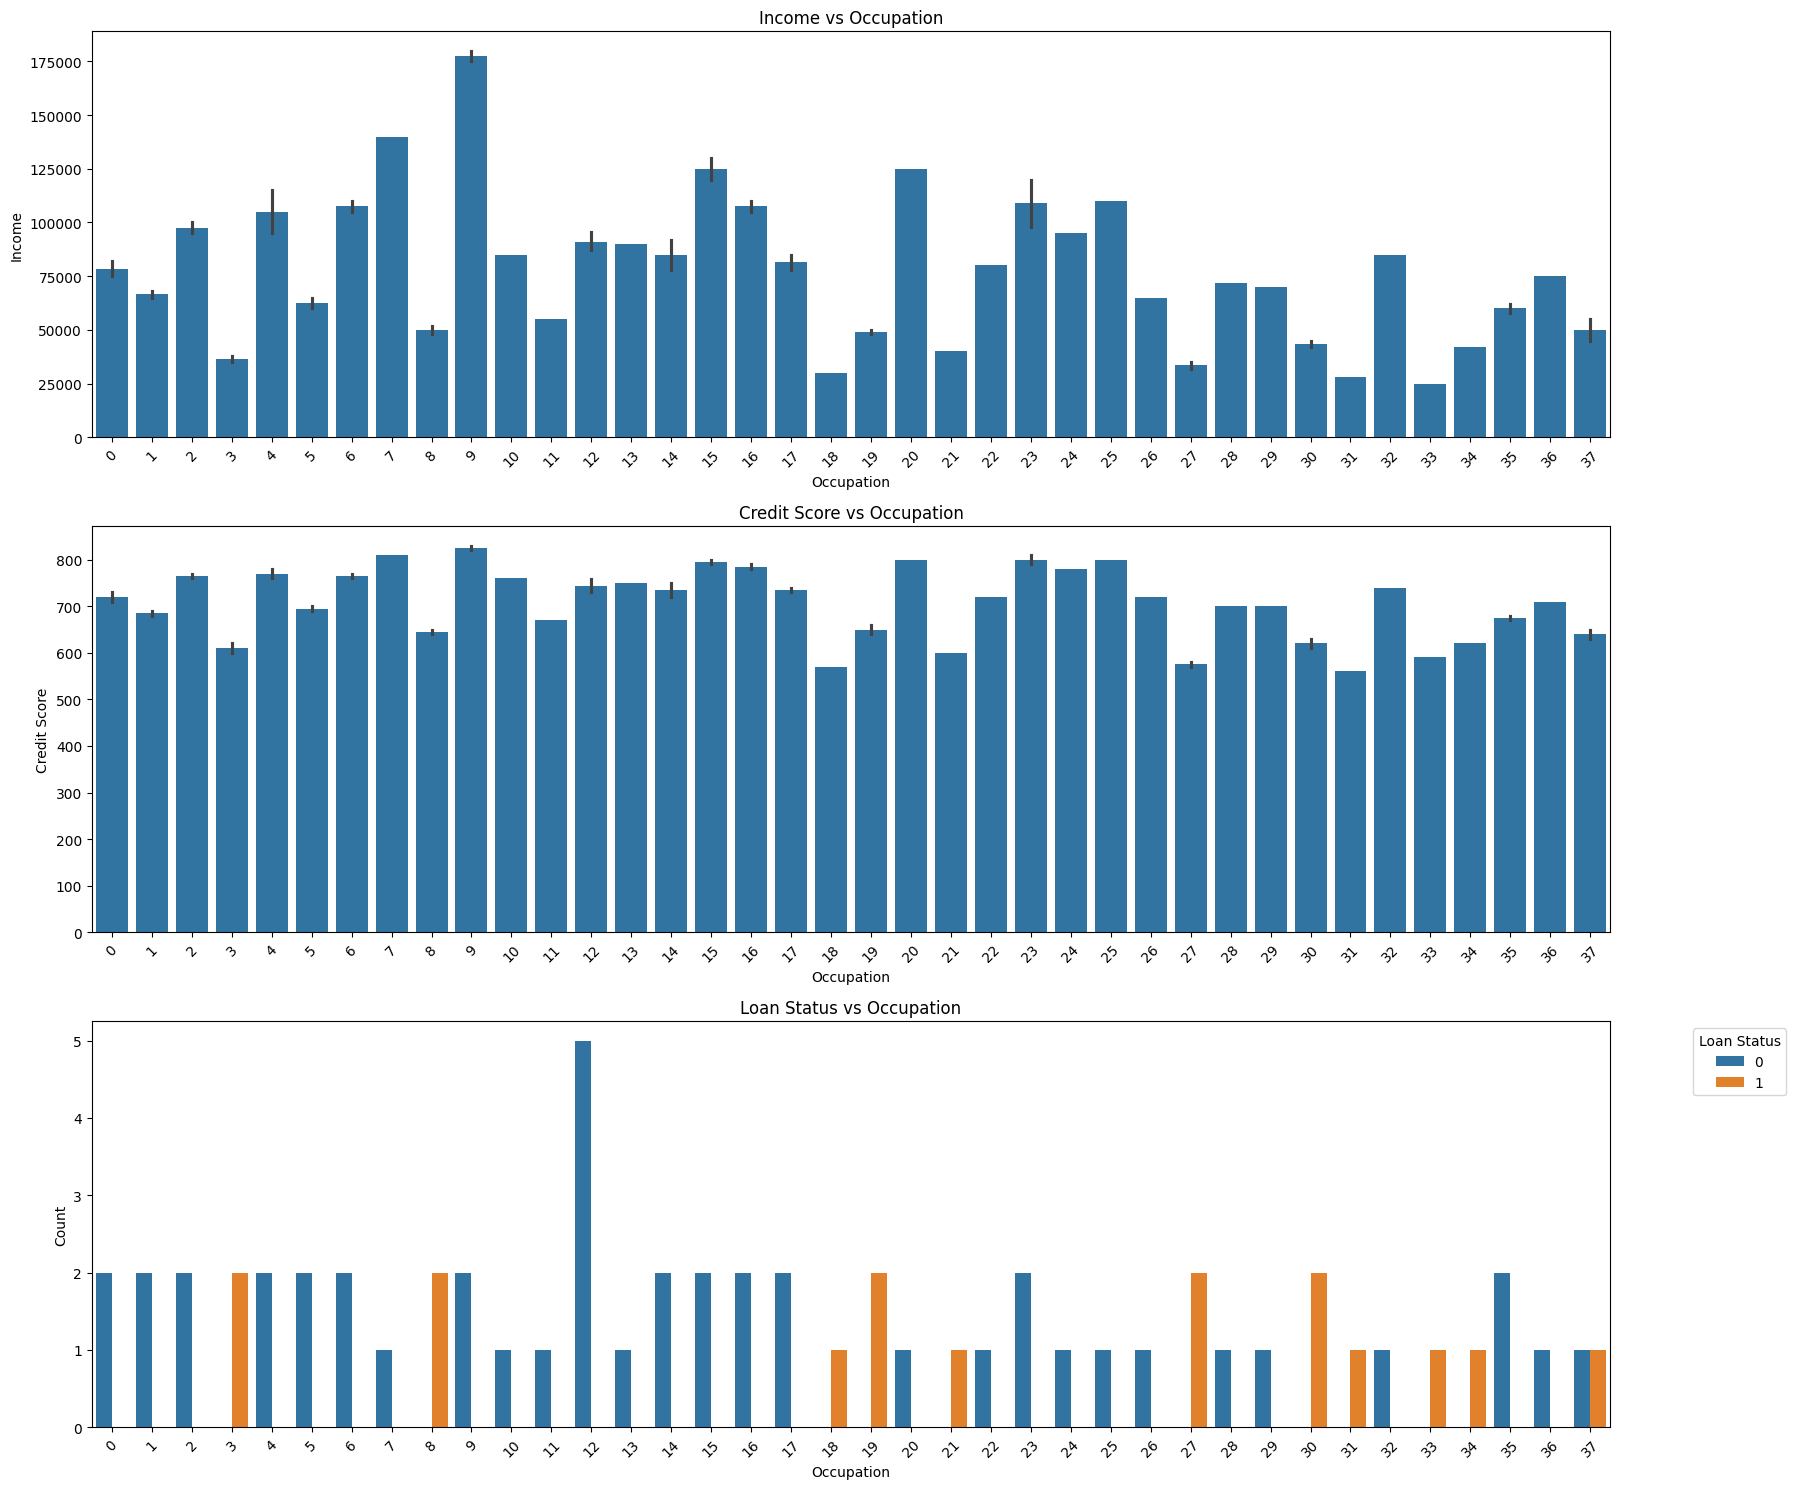

Model accuracy score: 0.9231
Training set score: 1.0000
Test set score: 0.9231
Confusion matrix

 [[9 1]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.75      1.00      0.86         3

    accuracy                           0.92        13
   macro avg       0.88      0.95      0.90        13
weighted avg       0.94      0.92      0.93        13



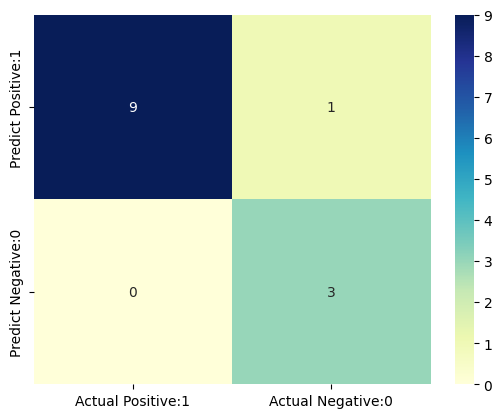

Classification accuracy : 0.9231
Classification error : 0.0769
Precision : 0.9000
Recall or Sensitivity : 1.0000
Specificity : 0.7500


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Reading the dataset
df = pd.read_csv("/content/loan.csv") # simple_loan_classification_datset

# Data Pre-processing and EDA
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['gender'] = df['gender'].astype(float)

label_encoder = LabelEncoder()
df['education_level_encoded'] = label_encoder.fit_transform(df['education_level'])
df.drop(columns=['education_level'], inplace=True)

df['occupation_encoded'] = label_encoder.fit_transform(df['occupation'])
df.drop(columns=['occupation'], inplace=True)

df['marital_status_encoded'] = label_encoder.fit_transform(df['marital_status'])
df.drop(columns=['marital_status'], inplace=True)

df['loan_status_encoded'] = label_encoder.fit_transform(df['loan_status'])
df.drop(columns=['loan_status'], inplace=True)

# Plotting boxplots for numerical columns
numerical = [var for var in df.columns if df[var].dtype != 'O']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot((len(numerical) + 1) // 2, 2, i)
    df.boxplot(column=col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Plotting histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot((len(numerical) + 1) // 2, 2, i)
    df[col].hist(bins=10)
    plt.xlabel(col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Visualizing outliers
IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
Lower_fence = df.age.quantile(0.25) - (IQR * 3)
Upper_fence = df.age.quantile(0.75) + (IQR * 3)
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df.income.quantile(0.75) - df.income.quantile(0.25)
Lower_fence = df.income.quantile(0.25) - (IQR * 3)
Upper_fence = df.income.quantile(0.75) + (IQR * 3)
print('Income outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df.credit_score.quantile(0.75) - df.credit_score.quantile(0.25)
Lower_fence = df.credit_score.quantile(0.25) - (IQR * 3)
Upper_fence = df.credit_score.quantile(0.75) + (IQR * 3)
print('Credit score outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# Plotting scatter plots
plt.figure(figsize=(10, 6))
sns.regplot(x="income", y="age", data=df)
plt.show()

# Bar plots
plt.figure(figsize=(18, 15))
plt.subplot(3, 1, 1)
sns.barplot(x='occupation_encoded', y='income', data=df)
plt.title('Income vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Income')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.barplot(x='occupation_encoded', y='credit_score', data=df)
plt.title('Credit Score vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.countplot(x='occupation_encoded', hue='loan_status_encoded', data=df)
plt.title('Loan Status vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Preparing the data
X = df.drop(columns=['loan_status_encoded'])
y = df['loan_status_encoded']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the Model
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

# Making predictions
y_pred_test = logreg.predict(X_test)

# Evaluating the model
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred_test))

# Visualizing the results
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# Additional evaluation metrics
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/loan.csv")

In [ ]:
df['gender'] = df['gender'].map({'Male':0,'Female' :1})
df['gender'].astype(float)

label_encoder = LabelEncoder()
df['education_level_encoded'] = label_encoder.fit_transform(df['loan_status'])

df.drop(columns=['education_level'],inplace = True)


df['occupation_encode'] = label_encoder.fit_transform(df['marital_status'])
df.drop(columns=['occupaion'],inplace=True)

df['marital_status_encoded'] = label_encoder.fit_transform(df[martial_status])
df.drop(columns=['martial_status'])

df['loan_status-encoded']=label_encoder.fit_transform(df['loan_status'])
df(columns = ['loan_status'],inplace = True)

KeyError: 'loan_status'

In [ ]:
numerical = [var for var in df.columns if df[var].dtype != 'O']

plt.figure(figsize=(15,10)
for i,col in enumerate(numerical,1):
  plt.subplot(len(numerical)+1)// 2,2,i)
  df[col].hist(bins=10)
  plt.xlabel(col)
  plt.ylabel(col)
IQR = df.type.quantile(0.25) - IQR * 3)